In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]='1'

In [2]:
import os
from os.path import join, expanduser
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision as tv

import dataloader
import util
from cam import CAM
import attack

In [3]:
idx2ctgr, name2idx = dataloader.get_class_dict(join(expanduser('~'),'data','imagenet'))
norm = tv.transforms.Normalize(mean=[0.485, 0.456, 0.406],
                               std=[0.229, 0.224, 0.225])
unnorm = util.UnNormalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229, 0.224, 0.225])

In [4]:
solver = CAM('vgg')
device = solver.device
model = solver.model
valid_dataset = solver.valid_dataset

In [5]:
idx = 2
input, target = solver.get_item(idx)
img = tv.transforms.ToPILImage()(unnorm(input.squeeze(0).cpu().detach()))
target.item()

230

In [6]:
# weights = solver.get_weights(input, target.item(), norm=True)

In [7]:
weights = 0
for idx in range(1000):
    input, target = solver.get_item(idx)
    weights += solver.get_weights(input, target.item(), norm=True)

(array([ 52., 177., 212.,  50.,  16.,   1.,   3.,   0.,   0.,   1.]),
 array([-4.078659 , -2.3414223, -0.6041857,  1.133051 ,  2.8702877,
         4.6075244,  6.344761 ,  8.081998 ,  9.819235 , 11.556471 ,
        13.293708 ], dtype=float32),
 <a list of 10 Patch objects>)

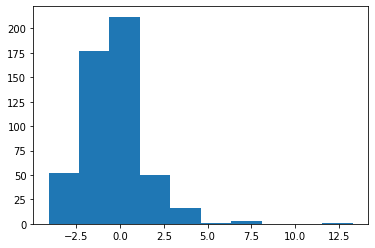

In [8]:
plt.hist(weights.cpu().numpy())

In [9]:
eps = 0.007
adv_weights = 0
for idx in range(1000):
    input, target = solver.get_item(idx)
    adv_attack = attack.attack_fgsm(model, input, target, eps)
    adv_img = attack.get_adversarial_image(img, adv_attack)
    adv_input = attack.image2input(adv_img, norm, device)
    adv_weights += solver.get_weights(adv_input, target.item(), norm=True)
# attack.inference(model, adv_input, idx2ctgr)

(array([  4.,  17.,  34.,  86., 137., 119.,  66.,  32.,  15.,   2.]),
 array([-0.1265293 , -0.10080118, -0.07507305, -0.04934492, -0.0236168 ,
         0.00211133,  0.02783946,  0.05356758,  0.07929571,  0.10502384,
         0.13075197], dtype=float32),
 <a list of 10 Patch objects>)

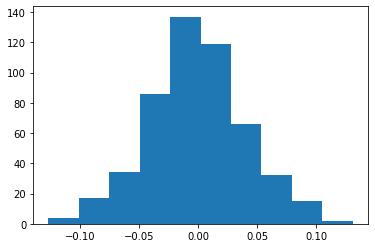

In [10]:
plt.hist(adv_weights.cpu().numpy())